<a href="https://colab.research.google.com/github/phraretein/flight_delay_prediction/blob/master/mlp_classification_embeddings_optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN - MLP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pickle5

     |████████████████████████████████| 133kB 4.1MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219250 sha256=4738fe53742741797da4dd1011400ffa74e5a76124981b2bd439e34fbef1f469
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [3]:
import pandas as pd
import numpy as np
import pickle5 as pickle

In [4]:
# Retrieve data
df = pickle.load(open(r'/content/drive/My Drive/Senior Project/df_train_update.pkl', "rb"))
df_test = pickle.load(open(r'/content/drive/My Drive/Senior Project/df_test_update.pkl', "rb"))

In [158]:
df_2_1 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_2 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_3 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_4 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_5 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_6 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_7 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_8 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_9 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]
# df_2_10 = df.loc[df['DEP_DELAY_GROUP'] == 2.0]

In [159]:
df = pd.concat([df, df_2_1
                # , df_2_2, df_2_3, df_2_4, df_2_5, df_2_6, df_2_7, df_2_8, df_2_9
                # , df_2_10
                ])

In [160]:
df_test_2_1 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_2 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_3 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_4 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_5 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_6 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_7 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_8 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_9 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]
# df_test_2_10 = df_test.loc[df_test['DEP_DELAY_GROUP'] == 2.0]

In [161]:
df_test = pd.concat([df_test, df_test_2_1
                    #  , df_test_2_2, df_test_2_3, df_test_2_4, df_test_2_5, df_test_2_6, df_test_2_7, df_test_2_8, df_test_2_9
                    #  , df_test_2_10
                     ])

In [5]:
# y and X
y = df[['DEP_DELAY_GROUP']].copy()
X = df.drop(['DEP_DELAY_GROUP'], axis=1).copy()
y_test = df_test[['DEP_DELAY_GROUP']].copy()
X_test = df_test.drop(['DEP_DELAY_GROUP'], axis=1).copy()
del df
del df_test

Text(0.5, 1.0, 'Weighted Delay Group Distribution')

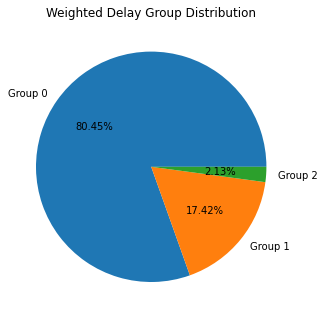

In [6]:
# Check weighting 
import matplotlib.pyplot as plt
(unique, counts) = np.unique(y, return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]);
ax.pie(counts, labels=['Group 0','Group 1','Group 2'], autopct='%1.2f%%')
ax.set_title('Weighted Delay Group Distribution')

In [7]:
# Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
X_scaled = X.copy()
scale_column = ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']
features = X_scaled[scale_column]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_scaled[scale_column] = features

X_test_scaled = X_test.copy()
test_features = X_test_scaled[scale_column]
test_scaler = StandardScaler().fit(test_features.values)
test_features = test_scaler.transform(test_features.values)
X_test_scaled[scale_column] = test_features
del features
del scaler

In [9]:
X_scaled.shape

(542371, 10)

In [7]:
from sklearn.decomposition import PCA

In [8]:
# PCA
# pca = PCA(0.95)
pca = PCA(n_components=23)
X_train_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

ValueError: ignored

In [8]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers import Concatenate

In [10]:
# Oversample
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features = [3, 4, 5])
X_resampled, y_resampled = smote_nc.fit_resample(X_scaled, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

KeyboardInterrupt: ignored

In [9]:
tf.compat.v1.enable_eager_execution()

In [10]:
# One-hot encoded y
y_train_df_encoded = pd.get_dummies(y, columns=['DEP_DELAY_GROUP'])
y_train_encoded = y_train_df_encoded.to_numpy()
del y_train_df_encoded 

y_test_df_encoded = pd.get_dummies(y_test, columns=['DEP_DELAY_GROUP'])
y_test_encoded = y_test_df_encoded.to_numpy()
del y_test_df_encoded 

In [11]:
# Calculate class weight
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_train_encoded, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

In [12]:
# numerical variables
flight_num_data = X_scaled.copy()
flight_num_data = flight_num_data.drop(['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST'], axis=1)
carrier_data = X_scaled[['OP_UNIQUE_CARRIER']].copy()
origin_data = X_scaled[['ORIGIN']].copy()
dest_data = X_scaled[['DEST']].copy()

In [13]:
carrier_encoded = pd.get_dummies(carrier_data, columns=['OP_UNIQUE_CARRIER'])
origin_encoded = pd.get_dummies(origin_data, columns=['ORIGIN'])
dest_encoded = pd.get_dummies(dest_data, columns=['DEST'])

In [14]:
# numerical variables
flight_num_data_test = X_test_scaled.copy()
flight_num_data_test = flight_num_data_test.drop(['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST'], axis=1)
carrier_data_test = X_test_scaled[['OP_UNIQUE_CARRIER']].copy()
origin_data_test = X_test_scaled[['ORIGIN']].copy()
dest_data_test = X_test_scaled[['DEST']].copy()

In [15]:
carrier_encoded_test = pd.get_dummies(carrier_data_test, columns=['OP_UNIQUE_CARRIER'])
origin_encoded_test = pd.get_dummies(origin_data_test, columns=['ORIGIN'])
dest_encoded_test = pd.get_dummies(dest_data_test, columns=['DEST'])

In [1]:
no_of_unique_carrier = len(carrier_data['OP_UNIQUE_CARRIER'].unique())
no_of_unique_origin = len(origin_data['ORIGIN'].unique())
no_of_unique_dest = len(dest_data['DEST'].unique())

flight_inp_num_data = keras.layers.Input(shape=(flight_num_data.shape[1],))
carrier_input = keras.Input(shape=(no_of_unique_carrier,), name='carrier_data')
origin_input = keras.Input(shape=(no_of_unique_origin,), name='origin_data')
dest_input = keras.Input(shape=(no_of_unique_dest,), name='destination_data')

carrier_embedded = Embedding(input_dim = no_of_unique_carrier, output_dim = 5, input_length = 1, name = 'OP_UNIQUE_CARRIER_embedding')(carrier_input)
origin_embedded = Embedding(input_dim = no_of_unique_origin, output_dim = 5, input_length = 1, name = 'ORIGIN_embedding')(origin_input)
dest_embedded = Embedding(input_dim = no_of_unique_dest, output_dim = 5, input_length = 1, name = 'DEST_embedding')(dest_input)

carrier_flatten = Flatten()(carrier_embedded)
origin_flatten = Flatten()(origin_embedded)
dest_flatten = Flatten()(dest_embedded)
concatenated = Concatenate()([carrier_flatten, 
                              origin_flatten, 
                              dest_flatten, 
                              flight_inp_num_data])

# input_layer = Dense(10, input_dim = 22, activation = 'relu', name='input_layer', kernel_initializer="he_normal")(concatenated)
input = BatchNormalization()(concatenated)
hidden1 = Dense(128, activation = 'relu', name='hidden_1')(input)
hidden1 = BatchNormalization()(hidden1)
hidden2 = Dense(128, activation = 'relu', name='hidden_2')(hidden1)
hidden2 = BatchNormalization()(hidden2)
hidden3 = Dense(128, activation = 'relu', name='hidden_3')(hidden2)
hidden3 = BatchNormalization()(hidden3)
out = Dense(3, activation = 'softmax', name='output_layer')(hidden3)

model = keras.Model(
    inputs = [carrier_input, 
              origin_input, 
              dest_input, 
              flight_inp_num_data],
    outputs = out
)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

NameError: ignored

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
carrier_data (InputLayer)       [(None, 10)]         0                                            
__________________________________________________________________________________________________
origin_data (InputLayer)        [(None, 10)]         0                                            
__________________________________________________________________________________________________
destination_data (InputLayer)   [(None, 10)]         0                                            
__________________________________________________________________________________________________
OP_UNIQUE_CARRIER_embedding (Em (None, 10, 5)        50          carrier_data[0][0]               
______________________________________________________________________________________________

In [18]:
print(d_class_weights)

{0: 0.41432792630924387, 1: 1.9137327546663845, 2: 15.646069522573201}


In [19]:
history = model.fit([carrier_encoded, origin_encoded, dest_encoded, flight_num_data], 
                    y_train_encoded,
                    batch_size=1024,
                    epochs=100,
                    verbose=1,
                    # class_weight = d_class_weights,
                    validation_data=([carrier_encoded_test, origin_encoded_test, dest_encoded_test, flight_num_data_test], y_test_encoded)
                    )

Epoch 1/100
530/530 [==============================] - 10s 12ms/step - loss: 0.7209 - accuracy: 0.7201 - val_loss: 0.5502 - val_accuracy: 0.8069
Epoch 2/100
530/530 [==============================] - 6s 11ms/step - loss: 0.5268 - accuracy: 0.8043 - val_loss: 0.5433 - val_accuracy: 0.8053
Epoch 3/100
530/530 [==============================] - 6s 11ms/step - loss: 0.5235 - accuracy: 0.8046 - val_loss: 0.5412 - val_accuracy: 0.8065
Epoch 4/100
530/530 [==============================] - 6s 11ms/step - loss: 0.5188 - accuracy: 0.8058 - val_loss: 0.5492 - val_accuracy: 0.7996
Epoch 5/100
530/530 [==============================] - 6s 11ms/step - loss: 0.5152 - accuracy: 0.8068 - val_loss: 0.5475 - val_accuracy: 0.8018
Epoch 6/100
530/530 [==============================] - 6s 11ms/step - loss: 0.5162 - accuracy: 0.8061 - val_loss: 0.5455 - val_accuracy: 0.8040
Epoch 7/100
530/530 [==============================] - 6s 11ms/step - loss: 0.5131 - accuracy: 0.8069 - val_loss: 0.5439 - val_accuracy

In [20]:
from sklearn.metrics import classification_report

y_pred = model.predict([carrier_encoded_test, origin_encoded_test, dest_encoded_test, flight_num_data_test], 
                       batch_size=512, 
                       verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1041/1041 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88    430538
         1.0       0.30      0.08      0.12     90587
         2.0       0.03      0.00      0.00     11381

    accuracy                           0.79    532506
   macro avg       0.38      0.35      0.34    532506
weighted avg       0.71      0.79      0.73    532506



In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_bool)
print("Accuracy using train sample: {:.4}%".format(accuracy * 100))

Accuracy using train sample: 79.09%


In [22]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_bool)
print(cm)

Confusion Matrix
[[414052  15975    511]
 [ 83346   7109    132]
 [ 10613    747     21]]


In [23]:
import seaborn as sns

In [24]:
# Confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
def plot_confusion_matrix(cm, classes,
                              normalize=False, 
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without Normalization")

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

Confusion Matrix, without Normalization
[[414052  15975    511]
 [ 83346   7109    132]
 [ 10613    747     21]]


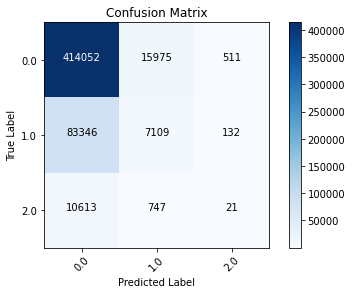

In [26]:
cm_plot_labels = ['0.0', '1.0', '2.0']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

In [31]:
print(tf.random.normal((1, 4)))

tf.Tensor([[-0.39378875  0.31615773  0.19293636  0.23052058]], shape=(1, 4), dtype=float32)


In [32]:
final_output = model([carrier_encoded.values, origin_encoded.values, dest_encoded.values, flight_num_data.values])

In [33]:
print(final_output)

tf.Tensor(
[[0.8988074  0.09926119 0.00193143]
 [0.88912404 0.1086065  0.00226946]
 [0.8972077  0.10139959 0.00139274]
 ...
 [0.49066472 0.4892525  0.02008281]
 [0.34722975 0.56546986 0.08730036]
 [0.45013028 0.52767015 0.02219958]], shape=(542371, 3), dtype=float32)


In [34]:
features_layer3 = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="hidden_3").output,
)

print(features_layer3([carrier_encoded.values, origin_encoded.values, dest_encoded.values, flight_num_data.values]))

tf.Tensor(
[[3.4656153  0.         0.         ... 0.         0.         0.        ]
 [3.0827563  0.         0.         ... 0.         0.         0.        ]
 [2.8542218  0.         0.         ... 0.         0.         0.        ]
 ...
 [5.244737   2.7226667  0.         ... 5.0625978  0.         2.228226  ]
 [6.230997   2.8516746  0.78582495 ... 2.5037608  0.         4.2023993 ]
 [5.322137   2.9059138  0.00989182 ... 4.7413125  0.         2.5521257 ]], shape=(542371, 128), dtype=float32)


In [32]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


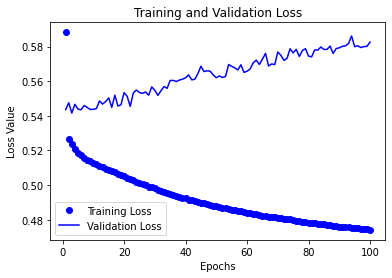

In [33]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

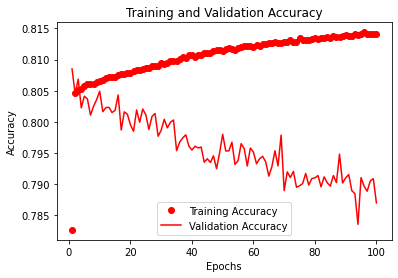

In [34]:
# Training and Validation Accuracy

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r-', label="Validation Accuracy")

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = baseline_model.predict(X_test_pca, batch_size=512, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1041/1041 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.52      0.65    430538
         1.0       0.22      0.40      0.28     90587
         2.0       0.03      0.23      0.05     11381

    accuracy                           0.50    532506
   macro avg       0.36      0.38      0.32    532506
weighted avg       0.72      0.50      0.57    532506



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_bool)
print("Accuracy using train sample: {:.4}%".format(accuracy * 100))

Accuracy using train sample: 49.62%


https://mmuratarat.github.io/2019-06-12/embeddings-with-numeric-variables-Keras

https://www.kaggle.com/colinmorris/embedding-layers

https://medium.com/@satnalikamayank12/on-learning-embeddings-for-categorical-data-using-keras-165ff2773fc9

https://www.arxiv-vanity.com/papers/1604.06737/

https://www.depends-on-the-definition.com/introduction-to-embeddings-with-neural-networks/

https://gdcoder.com/entity-embeddings-of-categorical-variables-in-neural-networks/



# Focal Loss

In [ ]:
!pip install anaconda dill

  Created wheel for anaconda: filename=anaconda-0.0.1.1-cp37-none-any.whl size=1125 sha256=eb95c47f49e33bef2de188d64062bf5ee7285d98c95ef8060184d7b7c879baf0
  Stored in directory: /root/.cache/pip/wheels/d5/0e/c7/c65ff914fe711a32210656cf0c8d9f28041d78bff409ad96d0
Successfully built anaconda


In [ ]:
#!/usr/bin/env python
"""
Copyright (c) 2019, by the Authors: Amir H. Abdi
This script is freely available under the MIT Public License.
Please see the License file in the root for details.
The following code snippet will convert the keras model files
to the freezed .pb tensorflow weight file. The resultant TensorFlow model
holds both the model architecture and its associated weights.
"""

import tensorflow as tf
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from pathlib import Path
from absl import app
from absl import flags
from absl import logging
import keras
from keras import backend as K
from keras.models import model_from_json, model_from_yaml
import dill
custom_object = {'binary_focal_loss_fixed': dill.loads(dill.dumps(binary_focal_loss(gamma=2., alpha=.25))),
                 'categorical_focal_loss_fixed': dill.loads(dill.dumps(categorical_focal_loss(gamma=2., alpha=[[.25, .25, .25]]))),
                 'categorical_focal_loss': categorical_focal_loss,
                 'binary_focal_loss': binary_focal_loss}

K.set_learning_phase(0)
FLAGS = flags.FLAGS

flags.DEFINE_string('input_model', None, 'Path to the input model.')
flags.DEFINE_string('input_model_json', None, 'Path to the input model '
                                              'architecture in json format.')
flags.DEFINE_string('input_model_yaml', None, 'Path to the input model '
                                              'architecture in yaml format.')
flags.DEFINE_string('output_model', None, 'Path where the converted model will '
                                          'be stored.')
flags.DEFINE_boolean('save_graph_def', False,
                     'Whether to save the graphdef.pbtxt file which contains '
                     'the graph definition in ASCII format.')
flags.DEFINE_string('output_nodes_prefix', None,
                    'If set, the output nodes will be renamed to '
                    '`output_nodes_prefix`+i, where `i` will numerate the '
                    'number of of output nodes of the network.')
flags.DEFINE_boolean('quantize', False,
                     'If set, the resultant TensorFlow graph weights will be '
                     'converted from float into eight-bit equivalents. See '
                     'documentation here: '
                     'https://github.com/tensorflow/tensorflow/tree/master/tensorflow/tools/graph_transforms')
flags.DEFINE_boolean('channels_first', False,
                     'Whether channels are the first dimension of a tensor. '
                     'The default is TensorFlow behaviour where channels are '
                     'the last dimension.')
flags.DEFINE_boolean('output_meta_ckpt', False,
                     'If set to True, exports the model as .meta, .index, and '
                     '.data files, with a checkpoint file. These can be later '
                     'loaded in TensorFlow to continue training.')

flags.mark_flag_as_required('input_model')
flags.mark_flag_as_required('output_model')


def load_model(input_model_path, input_json_path=None, input_yaml_path=None):
  if not Path(input_model_path).exists():
    raise FileNotFoundError(
        'Model file `{}` does not exist.'.format(input_model_path))
    try:
        model = keras.models.load_model(input_model_path, custom_objects=custom_object)
        return model
    except FileNotFoundError as err:
        logging.error('Input mode file (%s) does not exist.', FLAGS.input_model)
        raise err
    except ValueError as wrong_file_err:
        if input_json_path:
            if not Path(input_json_path).exists():
                raise FileNotFoundError(
                    'Model description json file `{}` does not exist.'.format(
                        input_json_path))
            try:
                model = model_from_json(open(str(input_json_path)).read())
                model.load_weights(input_model_path)
                return model
            except Exception as err:
                logging.error("Couldn't load model from json.")
                raise err
        elif input_yaml_path:
            if not Path(input_yaml_path).exists():
                raise FileNotFoundError(
                    'Model description yaml file `{}` does not exist.'.format(
                        input_yaml_path))
            try:
                model = model_from_yaml(open(str(input_yaml_path)).read())
                model.load_weights(input_model_path)
                return model
            except Exception as err:
                logging.error("Couldn't load model from yaml.")
                raise err
        else:
            logging.error(
                'Input file specified only holds the weights, and not '
                'the model definition. Save the model using '
                'model.save(filename.h5) which will contain the network '
                'architecture as well as its weights. '
                'If the model is saved using the '
                'model.save_weights(filename) function, either '
                'input_model_json or input_model_yaml flags should be set to '
                'to import the network architecture prior to loading the '
                'weights. \n'
                'Check the keras documentation for more details '
                '(https://keras.io/getting-started/faq/)')
            raise wrong_file_err


def main(args):
    # If output_model path is relative and in cwd, make it absolute from root
    output_model = FLAGS.output_model
    if str(Path(output_model).parent) == '.':
        output_model = str((Path.cwd() / output_model))

    output_fld = Path(output_model).parent
    output_model_name = Path(output_model).name
    output_model_stem = Path(output_model).stem
    output_model_pbtxt_name = output_model_stem + '.pbtxt'

    # Create output directory if it does not exist
    Path(output_model).parent.mkdir(parents=True, exist_ok=True)

    if FLAGS.channels_first:
        K.set_image_data_format('channels_first')
    else:
        K.set_image_data_format('channels_last')

    model = load_model(FLAGS.input_model, FLAGS.input_model_json, FLAGS.input_model_yaml)

    # TODO(amirabdi): Support networks with multiple inputs
    orig_output_node_names = [node.op.name for node in model.outputs]
    if FLAGS.output_nodes_prefix:
        num_output = len(orig_output_node_names)
        pred = [None] * num_output
        converted_output_node_names = [None] * num_output

        # Create dummy tf nodes to rename output
        for i in range(num_output):
            converted_output_node_names[i] = '{}{}'.format(
                FLAGS.output_nodes_prefix, i)
            pred[i] = tf.identity(model.outputs[i],
                                  name=converted_output_node_names[i])
    else:
        converted_output_node_names = orig_output_node_names
    logging.info('Converted output node names are: %s',
                 str(converted_output_node_names))

    sess = K.get_session()
    if FLAGS.output_meta_ckpt:
        saver = tf.train.Saver()
        saver.save(sess, str(output_fld / output_model_stem))

    if FLAGS.save_graph_def:
        tf.train.write_graph(sess.graph.as_graph_def(), str(output_fld),
                             output_model_pbtxt_name, as_text=True)
        logging.info('Saved the graph definition in ascii format at %s',
                     str(Path(output_fld) / output_model_pbtxt_name))

    if FLAGS.quantize:
        from tensorflow.tools.graph_transforms import TransformGraph
        transforms = ["quantize_weights", "quantize_nodes"]
        transformed_graph_def = TransformGraph(sess.graph.as_graph_def(), [],
                                               converted_output_node_names,
                                               transforms)
        constant_graph = graph_util.convert_variables_to_constants(
            sess,
            transformed_graph_def,
            converted_output_node_names)
    else:
        constant_graph = graph_util.convert_variables_to_constants(
            sess,
            sess.graph.as_graph_def(),
            converted_output_node_names)

    graph_io.write_graph(constant_graph, str(output_fld), output_model_name,
                         as_text=False)
    logging.info('Saved the freezed graph at %s',
                 str(Path(output_fld) / output_model_name))


if __name__ == "__main__":
    app.run(main)

NameError: ignored

In [ ]:
def focal_loss_model(X):
    # alpha = 10
    # n_h = X.shape[0] / (alpha * (37 + 3))
    # n_h = int((2 * 37) + 1)
    # n_h = int(((2/3) * 37) + 3)
    # Create model here
    model = Sequential()
    model.add(Dense(37, input_dim = X.shape[1], activation = 'relu', name='input_layer', kernel_initializer="he_normal")) # Rectified Linear Unit Activation Function
    # model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(64, activation = 'relu', name='hidden_1'))
    # model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(64, activation = 'relu', name='hidden_2'))
    # model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(64, activation = 'relu', name='hidden_3'))
    # model.add(Dropout(0.2))
    model.add(BatchNormalization())
    # model.add(Dense(1024, activation = 'relu', name='hidden_4'))
    # model.add(Dense(1024, activation = 'relu', name='hidden_5'))
    # model.add(Dense(99, activation = 'relu', name='hidden_3'))
    model.add(Dense(3, activation = 'softmax', name='output_layer')) # Softmax for multi-class classification
    # Compile model here
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], optimizer = opt, metrics=['accuracy'])
    return model

In [ ]:
focal_loss_model = focal_loss_model(X_scaled)

NameError: ignored

In [ ]:
history = baseline_model.fit(X_scaled, 
                        y_train_encoded, 
                        batch_size=1024, 
                        epochs=100, 
                        verbose=1, 
                        class_weight = d_class_weights, 
                        validation_data=(X_test_scaled, y_test_encoded))

In [ ]:
from keras import backend as K
import tensorflow as tf

def focal_loss_model(X, y_train, y_pred):
    alpha = 10
    n_h = X.shape[0] / (alpha * (37 + 3))


    def focal_loss(gamma=2.0, alpha=0.25):
      gamma = float(gamma)
      alpha = float(alpha)
      def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
      return focal_loss_fixed


    # Create model here
    model = Sequential()
    model.add(Dense(25, input_dim = X.shape[1], activation = 'relu', name='input_layer')) # Rectified Linear Unit Activation Function
    model.add(Dense(n_h, activation = 'relu', name='hidden_1'))
    # model.add(Dense(198, activation = 'relu', name='hidden_2'))
    # model.add(Dense(99, activation = 'relu', name='hidden_3'))
    model.add(Dense(3, activation = 'softmax', name='output_layer')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = focal_loss(alpha=1), optimizer = 'adam', metrics=['accuracy'])

    model.fit(X, y_train, epochs=80, batch_size=1028, verbose=1)
    return model

In [ ]:
model_f = Sequential()
model_f.add(Dense(25, input_dim = 37, activation = 'relu', name='input_layer')) # Rectified Linear Unit Activation Function
n_h = X.shape[0] / (8 * (37 + 3))
model_f.add(Dense(n_h, activation = 'relu', name='hidden_1'))
model_f.add(Dense(3, activation = 'softmax', name='output_layer'))

In [ ]:
def focal_loss(gamma=2.0, alpha=0.25):
  gamma = float(gamma)
  alpha = float(alpha)
  def focal_loss_fixed(y_true, y_pred):
    epsilon = 1.e-9
    y_true = tf.convert_to_tensor(y_true, tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, tf.float32)

    model_out = tf.add(y_pred, epsilon)
    ce = tf.multiply(y_true, -tf.log(model_out))
    weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
    fl = tf.multiply(alpha, tf.multiply(weight, ce))
    reduced_fl = tf.reduce_max(fl, axis=1)
    return tf.reduce_mean(reduced_fl)
  return focal_loss_fixed

In [ ]:
model_f.compile(loss=focal_loss(alpha=1), optimizer='adam', metrics=['accuracy'])

In [ ]:
model_f.fit(X_scaled, y_train_encoded, epochs=3, batch_size=1028)

Epoch 1/3


ValueError: ignored

In [ ]:
focal_loss_model = focal_loss_model(X_scaled, y_train_encoded)

TypeError: ignored

In [ ]:
focal_history = focal_loss_model.fit(X_scaled, 
                        y_train_encoded, 
                        batch_size=1028, 
                        epochs=80, 
                        verbose=1)

Epoch 1/80


ValueError: ignored

# Optuna

In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 4.4MB/s 
     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 163kB 7.4MB/s 
     |████████████████████████████████| 112kB 7.8MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 143kB 8.1MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=538c5b02ac62ed786ee0d6f6a6ab07ac1f1222e0c9545304b87a978ae6cf587a
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
# Optuna
import sklearn.metrics
import optuna
from sklearn.metrics import accuracy_score

def opt(X_train, y_train, X_test, y_test, class_weights, trial):
  # print(y_train)
  # print(y_test)
  # print(class_weights)
  # print(X.shape[0])
  # print(X.shape[1])
  # print(y.shape[1])
  # clear_session()
  # One-hot encoded y
  y_train_df_encoded = pd.get_dummies(y_train, columns=['DEP_DELAY_GROUP'])
  y_train_encoded = y_train_df_encoded.to_numpy()
  del y_train_df_encoded 

  y_test_df_encoded = pd.get_dummies(y_test, columns=['DEP_DELAY_GROUP'])
  y_test_encoded = y_test_df_encoded.to_numpy()
  del y_test_df_encoded 
  
  # parameters
  # alpha = trial.suggest_discrete_uniform('alpha', 2, 10, 1)
  # input_layer = X.shape[1]
  neurons = [64, 128, 256, 512, 1024]
  input_neurons = neurons[int(trial.suggest_discrete_uniform('input_neuron_index', 0, 4, 1))]
  hidden1_neurons = neurons[int(trial.suggest_discrete_uniform('hidden1_neuron_index', 0, 4, 1))]
  hidden2_neurons = neurons[int(trial.suggest_discrete_uniform('hidden2_neuron_index', 0, 4, 1))]
  hidden3_neurons = neurons[int(trial.suggest_discrete_uniform('hidden3_neuron_index', 0, 4, 1))]
  hidden4_neurons = neurons[int(trial.suggest_discrete_uniform('hidden4_neuron_index', 0, 4, 1))]
  
  # n_h = int(X.shape[0] / (alpha * (input_layer + y.shape[1])))
  n_h = trial.suggest_int('n_hidden_layer', 10, 20)
  # batch_val = [32, 64, 128, 256]
  batch_val = [256, 512, 1024, 2048]
  batch_size = batch_val[int(trial.suggest_discrete_uniform('batch_index', 0, 3, 1))]
  # epochs_val = [100, 200]
  # epochs = epochs_val[int(trial.suggest_discrete_uniform('epochs', 0, 1, 1))]
  # epochs = trial.suggest_int('epochs', 50, 100)
  epochs = 10
  # print(batch_size)
  # print(n_h)
  # Create model 
  model = Sequential()
  # model.add(Dense(input_layer, input_dim = X.shape[1], activation = 'relu', name='input_layer')) # Rectified Linear Unit Activation Function
  model.add(Dense(input_neurons, input_dim = X.shape[1], activation = 'relu', name='input_layer')) # Rectified Linear Unit Activation Function
  model.add(Dense(hidden1_neurons, activation = 'relu', name='hidden_1'))
  model.add(Dense(hidden2_neurons, activation = 'relu', name='hidden_2'))
  model.add(Dense(hidden3_neurons, activation = 'relu', name='hidden_3'))
  model.add(Dense(hidden4_neurons, activation = 'relu', name='hidden_4'))
  # model.add(Dense(n_h, activation = 'relu', name='hidden_1'))
  model.add(Dense(3, activation = 'softmax', name='output_layer')) # Softmax for multi-class classification
  # Compile model 
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

  model.fit(X_train, 
            y_train_encoded, 
            batch_size=batch_size, 
            epochs=epochs, 
            verbose=1,
            class_weight=class_weights)
  pred_test = model.predict(X_test)
  y_pred_bool = np.argmax(pred_test, axis=1)

  return (1.0 - accuracy_score(y_test, y_pred_bool))

In [ ]:
import functools

study = optuna.create_study()
study.optimize(functools.partial(opt, X_scaled, y, X_test_scaled, y_test, d_class_weights), n_trials=25, show_progress_bar=True)

[I 2021-04-19 18:01:00,906] A new study created in memory with name: no-name-2dfb2f96-7508-4c07-9509-776c846e612e
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



Epoch 1/10
530/530 [==============================] - 3s 4ms/step - loss: 0.5581 - accuracy: 0.7987
Epoch 2/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5279 - accuracy: 0.8043
Epoch 3/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5243 - accuracy: 0.8048
Epoch 4/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5216 - accuracy: 0.8046
Epoch 5/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5198 - accuracy: 0.8063
Epoch 6/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5174 - accuracy: 0.8056
Epoch 7/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5137 - accuracy: 0.8071
Epoch 8/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5144 - accuracy: 0.8058
Epoch 9/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5088 - accuracy: 0.8082
Epoch 10/10
530/530 [==============================] - 2s 4ms/step - loss: 0.5091 - accuracy: 0.8073

In [ ]:
# Best Param List
print(study.best_params)

{'input_neuron_index': 0.0, 'hidden1_neuron_index': 3.0, 'hidden2_neuron_index': 0.0, 'hidden3_neuron_index': 4.0, 'hidden4_neuron_index': 0.0, 'n_hidden_layer': 10, 'batch_index': 3.0}


In [ ]:
import joblib

In [ ]:
filename = r'/content/drive/My Drive/Senior Project/study.pkl'
joblib.dump(study, open(filename, 'wb'))
print("Study Saved Successfully")

Study Saved Successfully


## Load Optuna Study Model

In [ ]:
import os

In [ ]:
if os.path.exists(r'/content/drive/My Drive/Senior Project/study.pkl'):
    study =  joblib.load(open(r'/content/drive/My Drive/Senior Project/study.pkl', 'rb'))

In [ ]:
print(study)

In [ ]:
# Plot Parameter Importance Graph
from optuna.visualization import plot_param_importances
fig = plot_param_importances(study)
fig.show()
# fig.write_image(r'/content/drive/My Drive/Senior Project/Hyperparameter Importance.png')

In [ ]:
# Plot Optimization History
fig = optuna.visualization.plot_optimization_history(study)
fig.show()
# fig.write_image(r'/content/drive/My Drive/Senior Project/Optimization History Plot.png')

In [ ]:
def opt_model(X, alpha):
  # parameters
  alpha = alpha
  input_layer = X.shape[1]
  n_h = int(X.shape[0] / (alpha * (input_layer + y.shape[1])))
  # batch_val = [32, 64, 128, 256]
  # batch_size = batch_val[batch_index]
  # epochs_val = [100, 200]
  # epochs = epochs_val[int(trial.suggest_discrete_uniform('epochs', 0, 1, 1))]
  # epochs = epochs
  # print(batch_size)
  # print(n_h)
  # Create model 
  model = Sequential()
  model.add(Dense(input_layer, input_dim = X.shape[1], activation = 'relu', name='input_layer')) # Rectified Linear Unit Activation Function
  model.add(Dense(n_h, activation = 'relu', name='hidden_1'))
  model.add(Dense(3, activation = 'softmax', name='output_layer')) # Softmax for multi-class classification
  # Compile model 
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

  # model.fit(X_train, 
  #           y_train_encoded, 
  #           batch_size=batch_size, 
  #           epochs=epochs, 
  #           verbose=1, 
  #           class_weight=class_weights)
  return model

In [ ]:
opt_alpha = study.best_params['alpha']
opt_batch_index = int(study.best_params['batch_index'])
opt_epochs = study.best_params['epochs']

In [ ]:
opt_epochs

80

In [ ]:
clf = opt_model(X_scaled, opt_alpha)

In [ ]:
batch_val = [32, 64, 128, 256]
opt_batch_size = batch_val[opt_batch_index]

In [ ]:
history = clf.fit(X_scaled, 
                  y_train_encoded, 
                  batch_size=opt_batch_size, 
                  epochs=opt_epochs, 
                  verbose=1, 
                  class_weight = d_class_weights, 
                  validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/80
16950/16950 [==============================] - 62s 4ms/step - loss: 1.0542 - accuracy: 0.4999 - val_loss: 1.0502 - val_accuracy: 0.4858
Epoch 2/80
16950/16950 [==============================] - 63s 4ms/step - loss: 1.0429 - accuracy: 0.5071 - val_loss: 1.0394 - val_accuracy: 0.5085
Epoch 3/80
16950/16950 [==============================] - 64s 4ms/step - loss: 1.0359 - accuracy: 0.5118 - val_loss: 1.0254 - val_accuracy: 0.5228
Epoch 4/80
16950/16950 [==============================] - 64s 4ms/step - loss: 1.0331 - accuracy: 0.5212 - val_loss: 1.0144 - val_accuracy: 0.5118
Epoch 5/80
16950/16950 [==============================] - 64s 4ms/step - loss: 1.0344 - accuracy: 0.5163 - val_loss: 1.0338 - val_accuracy: 0.5238
Epoch 6/80
16950/16950 [==============================] - 63s 4ms/step - loss: 1.0314 - accuracy: 0.5229 - val_loss: 1.0281 - val_accuracy: 0.5232
Epoch 7/80
16950/16950 [==============================] - 63s 4ms/step - loss: 1.0248 - accuracy: 0.5256 - val_loss: 1

In [ ]:
from sklearn.metrics import classification_report

y_pred_opt = clf.predict(X_test_scaled, batch_size=opt_batch_size, verbose=1)
y_pred_opt_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_opt_bool))

16641/16641 [==============================] - 15s 905us/step
              precision    recall  f1-score   support

         0.0       0.86      0.51      0.64    430538
         1.0       0.23      0.35      0.28     90587
         2.0       0.03      0.40      0.06     11381

    accuracy                           0.48    532506
   macro avg       0.38      0.42      0.33    532506
weighted avg       0.74      0.48      0.56    532506



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_opt_bool)
print("Accuracy using train sample: {:.4}%".format(accuracy * 100))

Accuracy using train sample: 47.67%


In [ ]:
def opt_model_new(X_train, y_train_encoded, alpha, batch_size, epochs, class_weights):
  # parameters
  alpha = alpha
  input_layer = X.shape[1]
  n_h = int(X.shape[0] / (alpha * (input_layer + y.shape[1])))
  # batch_val = [32, 64, 128, 256]
  # batch_size = batch_val[batch_index]
  # epochs_val = [100, 200]
  # epochs = epochs_val[int(trial.suggest_discrete_uniform('epochs', 0, 1, 1))]
  # epochs = epochs
  # print(batch_size)
  # print(n_h)
  # Create model 
  model = Sequential()
  model.add(Dense(input_layer, input_dim = X.shape[1], activation = 'relu', name='input_layer')) # Rectified Linear Unit Activation Function
  model.add(Dense(n_h, activation = 'relu', name='hidden_1'))
  model.add(Dense(3, activation = 'softmax', name='output_layer')) # Softmax for multi-class classification
  # Compile model 
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

  model.fit(X_train, 
            y_train_encoded, 
            batch_size=batch_size, 
            epochs=epochs, 
            verbose=1, 
            class_weight=class_weights)
  
  return model

In [ ]:
clf_new = opt_model_new(X_scaled, y_train_encoded, alpha=opt_alpha, batch_size=opt_batch_size, epochs=opt_epochs, class_weights=d_class_weights)

Epoch 1/80
16950/16950 [==============================] - 37s 2ms/step - loss: 1.0550 - accuracy: 0.4897
Epoch 2/80
16950/16950 [==============================] - 37s 2ms/step - loss: 1.0443 - accuracy: 0.5079
Epoch 3/80
16950/16950 [==============================] - 37s 2ms/step - loss: 1.0382 - accuracy: 0.5092
Epoch 4/80
16950/16950 [==============================] - 37s 2ms/step - loss: 1.0332 - accuracy: 0.5215
Epoch 5/80
16950/16950 [==============================] - 37s 2ms/step - loss: 1.0282 - accuracy: 0.5222
Epoch 6/80
16950/16950 [==============================] - 37s 2ms/step - loss: 1.0298 - accuracy: 0.5228
Epoch 7/80
16950/16950 [==============================] - 37s 2ms/step - loss: 1.0343 - accuracy: 0.5261
Epoch 8/80
16950/16950 [==============================] - 36s 2ms/step - loss: 1.0264 - accuracy: 0.5271
Epoch 9/80
16950/16950 [==============================] - 36s 2ms/step - loss: 1.0245 - accuracy: 0.5267
Epoch 10/80
16950/16950 [==============================

In [ ]:
y_pred_opt_new = clf_new.predict(X_test_scaled, batch_size=opt_batch_size, verbose=1)
y_pred_opt_new_bool = np.argmax(y_pred_opt_new, axis=1)

print(classification_report(y_test, y_pred_opt_bool))

16641/16641 [==============================] - 15s 883us/step
              precision    recall  f1-score   support

         0.0       0.86      0.51      0.64    430538
         1.0       0.23      0.35      0.28     90587
         2.0       0.03      0.40      0.06     11381

    accuracy                           0.48    532506
   macro avg       0.38      0.42      0.33    532506
weighted avg       0.74      0.48      0.56    532506



In [ ]:
accuracy_new = accuracy_score(y_test, y_pred_opt_new_bool)
print("Accuracy using train sample: {:.4}%".format(accuracy_new * 100))

Accuracy using train sample: 49.4%


In [ ]:
!pip install deployml

In [ ]:
# Save model
filename = r'/content/drive/My Drive/Senior Project/mlp_clf_optuna_model.h5'
# joblib.dump(clf_new, open(filename, 'wb'))
# clf_new.deploy_model(description='Keras NN',
#                 file_name=filename)
# save model and architecture to single file
clf_new.save(filename)
if os.path.exists(filename):
    print("Model Saved Successfully")

Model Saved Successfully


In [ ]:
# Testing Accuracy
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
# plot_confusion_matrix(clf_new, X_scaled, y_pred_opt_new_bool, values_format='d')

# y_pred = clf_new.predict(X_test_scaled, batch_size=opt_batch_size, verbose=1)
# y_pred_bool = np.argmax(y_pred_opt_new, axis=1)
# accuracy = accuracy_score(y_test, y_pred_opt_new_bool)
# print("Accuracy: {:.4}%".format(accuracy * 100))

accuracy_new = accuracy_score(y_test, y_pred_opt_new_bool)
print("Accuracy using train sample: {:.4}%".format(accuracy_new * 100))

print(classification_report(y_test, y_pred_opt_new_bool))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_opt_new_bool)
print("Kappa Score: " + str(kappa))

from sklearn.metrics import matthews_corrcoef 

print("MMC: " + str(matthews_corrcoef(y_test, y_pred_opt_new_bool)))

from sklearn.metrics import f1_score
print("f1-score: " + str(f1_score(y_test, y_pred_opt_new_bool, average='micro')))

Accuracy using train sample: 49.4%
              precision    recall  f1-score   support

         0.0       0.86      0.55      0.67    430538
         1.0       0.26      0.22      0.23     90587
         2.0       0.03      0.51      0.06     11381

    accuracy                           0.49    532506
   macro avg       0.38      0.42      0.32    532506
weighted avg       0.74      0.49      0.58    532506

Kappa Score: 0.0767668274328368
MMC: 0.09680132448345209
f1-score: 0.49400194551798476


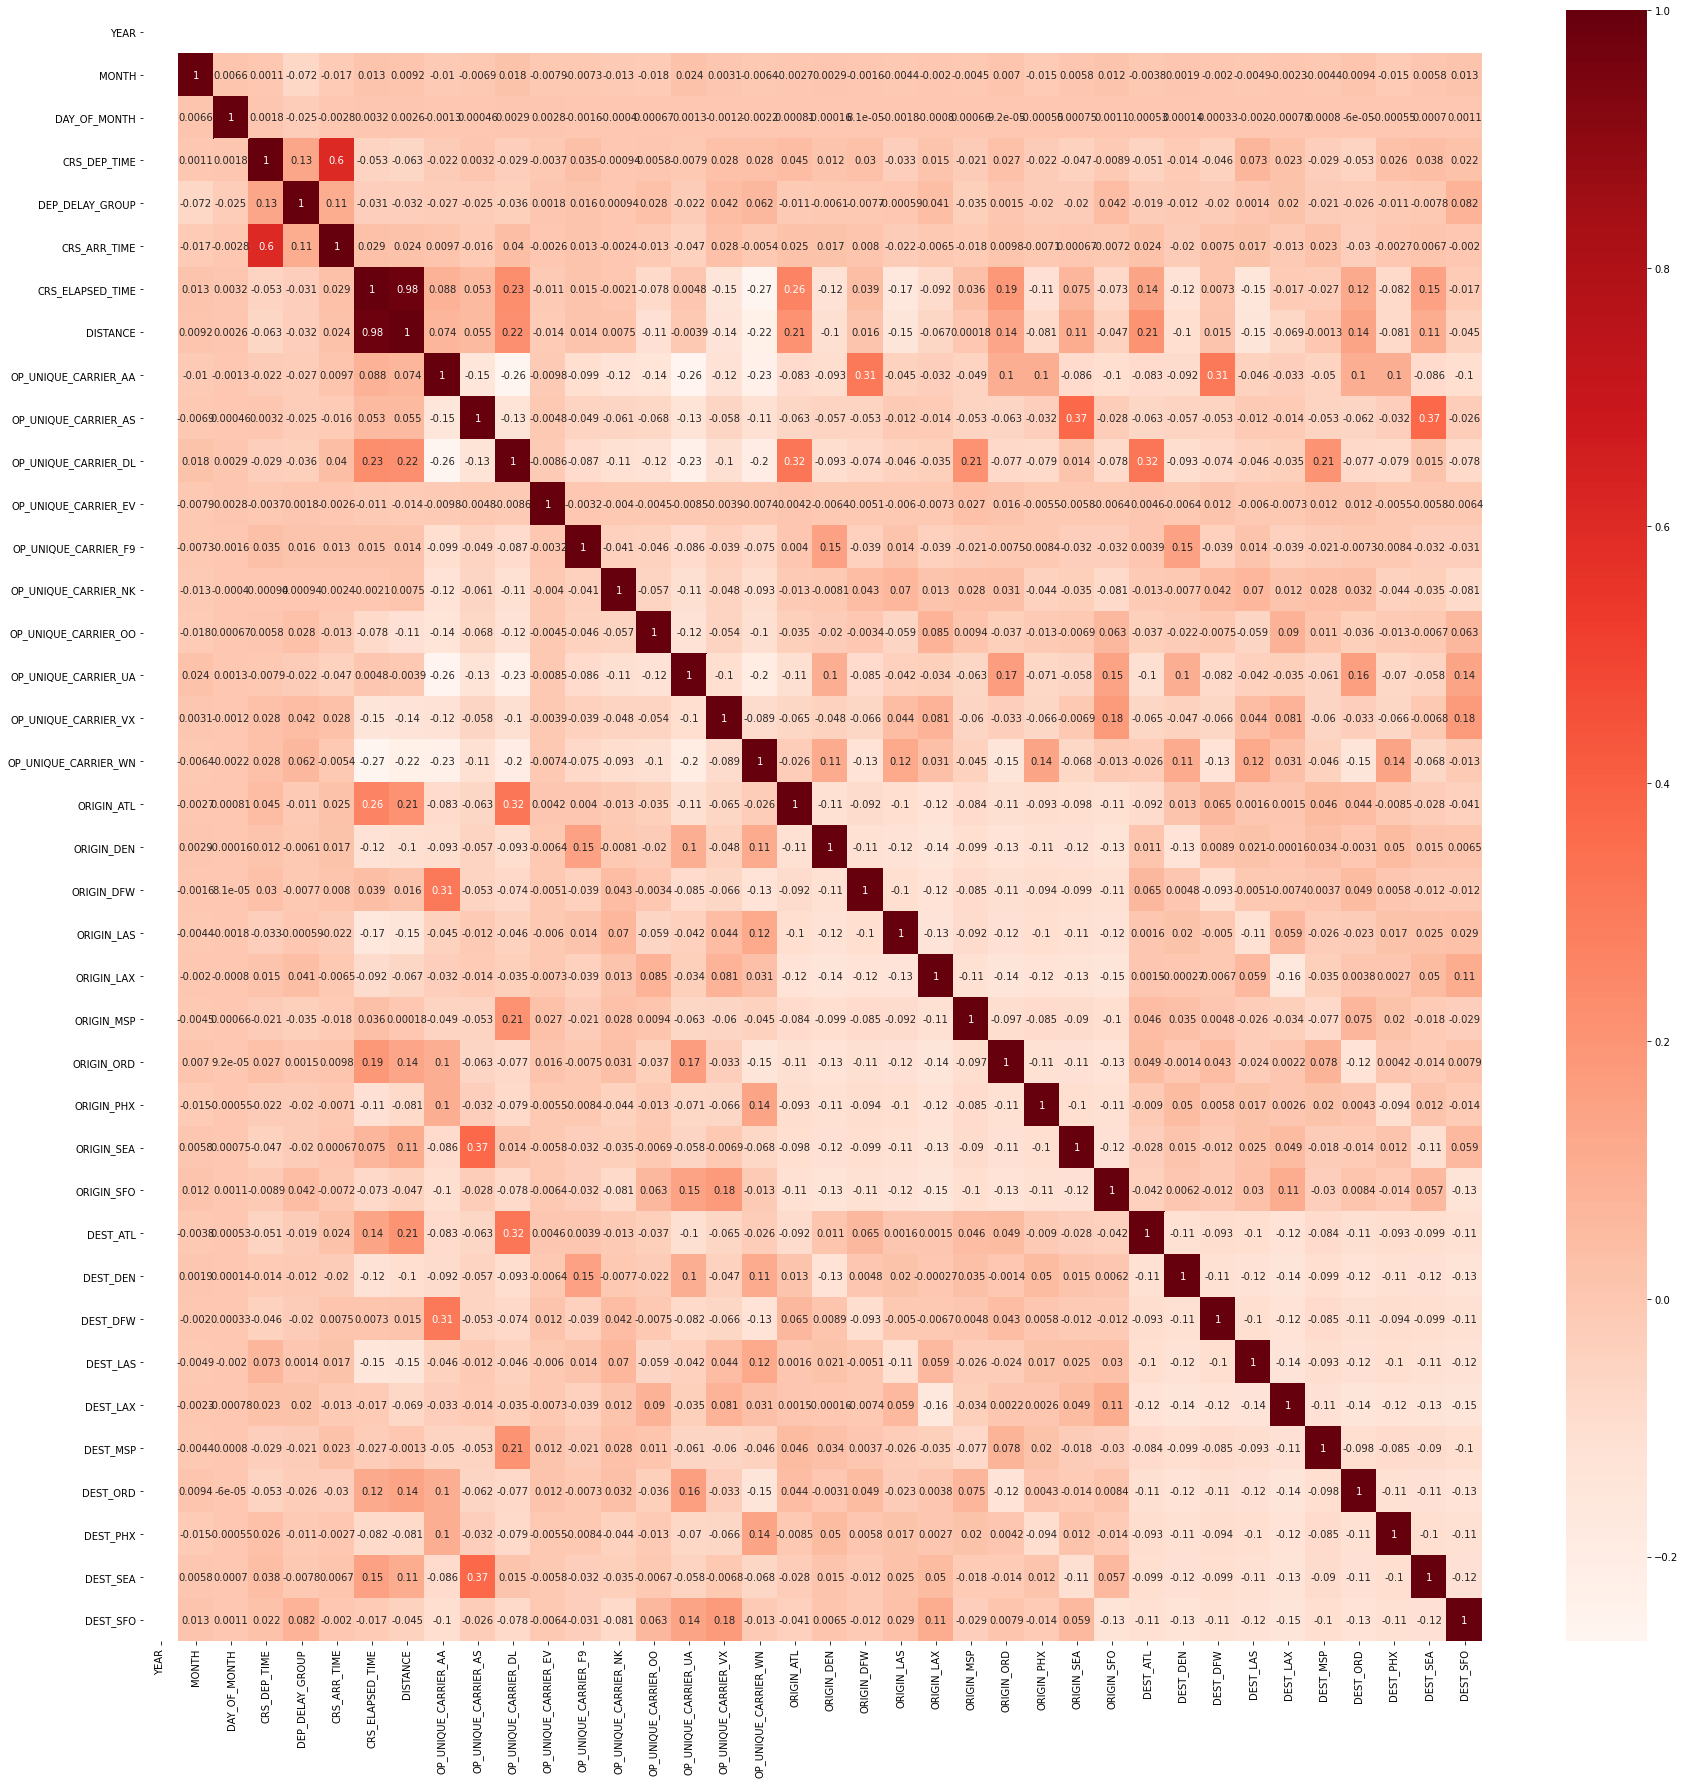

In [ ]:
# Feature Heatmap
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()